#DeepFace library installation

In [ ]:
!pip install deepface

## Importing essential libraries

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import imutils
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

## Webcam image to Capture face on Google Colab

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
 
image_file = take_photo()

<IPython.core.display.Javascript object>

## Prediction for emotion of the recorded face


Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace and Dlib. The library is mainly based on Keras and TensorFlow.

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


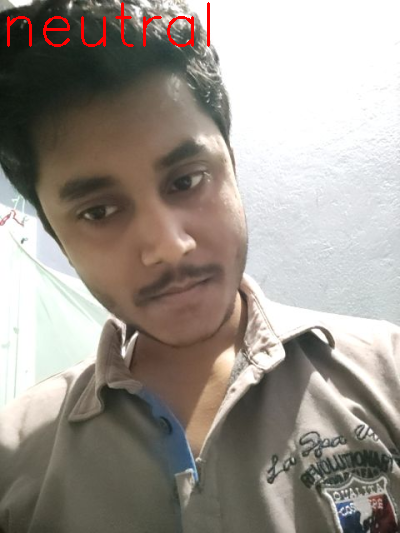

In [ ]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
img = cv2.imread(image_file)
 
# resize it to have a maximum width of 400 pixels
img = imutils.resize(img, width=400)
 
#We use the dnn.blobFromImage function to construct an input blob by resizing the image to a fixed 300x300 pixels and then normalizing it.
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
(h, w) = img.shape[:2]
 
#We Pass the blob through the neural network and obtain the detections and predictions
 
predictions= DeepFace.analyze(img)
predictions['dominant_emotion']
 
#We are trying to draw rectangle across face
 
faceCascade= cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Face emotion recognition/haarcascade_frontalface_default.xml')
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces= faceCascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
 
 
#We are trying to print dominant emotion across rectangle over face
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
       predictions ['dominant_emotion'],
       (0,45),
       font,2,
       (0,0,255),
       2,
       cv2.LINE_4);
 
#resulting image
 
cv2_imshow(img)